In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [39]:
def simulation(v0, Dr, dt, step):
    x0 = 0. # um
    y0 = 0. # um
    the0 = 2*np.pi*random.random() # radian
    step = int(step)
    
    out = []
    out.append([0, x0, y0])
    for i in range(step):
        zeta = random.gauss(0,1)

        x1 = x0 + v0*np.cos(the0)*dt
        y1 = y0 + v0*np.sin(the0)*dt
        the1 = the0 + np.sqrt(2*Dr) * zeta * np.sqrt(dt)

        out.append([(i+1)*dt, x1, y1])

        x0 = x1
        y0 = y1
        the0 = the1
        
    out = np.array(out)
        
    r2_mat = []
    for i in range(len(out)):
        r2_mat.append([out[i,0], out[i,1]**2 + out[i,2]**2])
        
    t, x, y = out.T
    _, r2 = np.array(r2_mat).T
        
    return(t, x, y, r2)

In [36]:
Dr_list = [0.003]
r2_mat = []

for i, Dr in enumerate(Dr_list):
    for j in range(10):
        t, x, y, r2 = simulation(v0=1, Dr=Dr, dt=0.001, step=1e4)    
        r2_mat.append(r2)
r2_mat = np.array(r2_mat).T

In [37]:
def diff(t, v0, Dr):
    return v0*v0/Dr/Dr*(Dr*t + np.exp(-Dr*t) - 1)

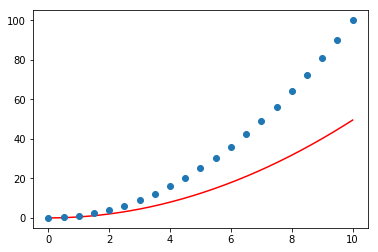

In [38]:
plt.errorbar(t[::500], np.mean(r2_mat, axis=1)[::500], yerr=np.std(r2_mat, axis=1)[::500], fmt='o')
plt.plot(t, diff(t,v0=1, Dr=0.003), c='red')
#plt.yscale('log')
#plt.ylim((1e1, 1e7))

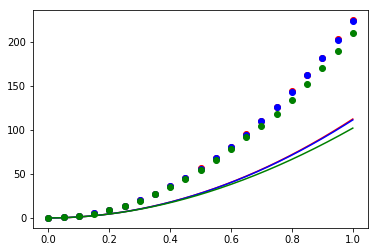

In [125]:
t = r2_mat[:,0]
Dr_list = [0.003, 0.03, 0.3]
v0=15

c_list = ['red', 'blue', 'green']

for i in range(3):
    plt.plot(t, diff(t,v0, Dr_list[i]), c=c_list[i])
    plt.plot(r2_mat[::50,0], r2_mat[::50,i+1], 'o', c=c_list[i])

In [255]:
Dr_list = [0.003, 0.01]
r2_mat = []
label_list = []
for i, Dr in enumerate(Dr_list):
    for j in range(50):
        t, x, y, r2 = simulation(v0=5, Dr=Dr, dt=0.001, step=1e3)  
        
        r2_mat.append(r2)
        label_list.append(i)
        
r2_mat = np.array(r2_mat)

In [256]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
norm_r2_mat = scaler.fit_transform(r2_mat)

pca = PCA(n_components=10)
x_pca = pca.fit_transform(norm_r2_mat)

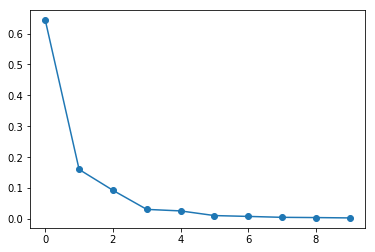

In [257]:
plt.plot(pca.explained_variance_ratio_, '-o')

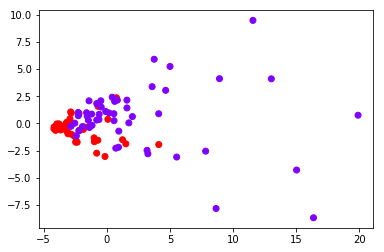

In [258]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=label_list, cmap=plt.cm.rainbow_r)